In [1]:
pip install -U fortran-magic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.5 MB/s eta 0:00:00


In [2]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

'aaaa'

In [3]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 34 µs, sys: 4 µs, total: 38 µs
Wall time: 42.9 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
ad

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [4]:
def matmul(A, B):
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [11]:
try:
    result = matmul(A, B)
    print("Resultado de la multiplicación:")
    for row in result:
        print(row)
except IndexError as e:
    print("Err:", e)
except Exception as e:
    print("Otro err:", e)


Err: list index out of range


**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [12]:
def matmul(A, B):
    """Multiply matrix A by matrix B with compatibility check."""
    if len(A[0]) != len(B):
        raise ValueError("Matrices incompatibles")

    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [13]:
matmul(a, b)

ValueError: Matrices incompatibles

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [14]:
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5],
     [4, 3, 6, 7]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [15]:
matmul(a, b)

[[17, 17, 29, 35], [24, 25, 42, 51], [45, 49, 81, 99], [7, 8, 13, 16]]

In [16]:
import random

In [21]:
random.normalvariate(0,1)

0.2856842582675995

In [22]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.8273799497090826, 0.32482322228515126, 0.7233132365423324],
 [0.9419317689384634, 0.7175816147930766, 0.5451616581992262]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [24]:
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
result = matmul(randa, randb)
#Average excecution time 9 Seconds

**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [25]:
import random
import time
import pandas as pd

def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

def matmul(A, B):
    """Multiply matrix A by matrix B."""

    if len(A[0]) != len(B):
        raise ValueError("El número de columnas de A debe ser igual al número de filas de B.")

    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for _ in range(cols_out)] for _ in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

# matrix generation
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)

# execution
execution_times = []
for _ in range(10):
    start_time = time.time()
    matmul(randa, randb)
    end_time = time.time()
    execution_times.append(end_time - start_time)

# Calcular el tiempo promedio de ejecución
average_time = sum(execution_times) / len(execution_times)

# Crear el DataFrame con los resultados
df = pd.DataFrame({
    'Language': ['Python'],
    'Average Secs': [average_time]
})

# indice
df.index = df.index + 1

# show datafrafe
print(df)

  Language  Average Secs
1   Python     11.210303


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [26]:
import random
import time
import pandas as pd
import numpy as np

def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randa = random_matrix(600, 100)
randb = random_matrix(100, 600)

randa_np = np.array(randa)
randb_np = np.array(randb)

execution_times_np = []
for _ in range(10):
    start_time = time.time()
    np.matmul(randa_np, randb_np)
    end_time = time.time()
    execution_times_np.append(end_time - start_time)

average_time_np = sum(execution_times_np) / len(execution_times_np)

new_data = pd.DataFrame({'Language': ['NumPy'], 'Average Secs': [average_time_np]})

df = pd.concat([df, new_data], ignore_index=True)

df.index = df.index + 1

print(df)

  Language  Average Secs
1   Python     11.210303
2    NumPy      0.006130


In [27]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 10.3 s, sys: 43.5 ms, total: 10.3 s
Wall time: 10.6 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 15.4 ms, sys: 3 µs, total: 15.4 ms
Wall time: 16.6 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [28]:
import random

# Función para generar una matriz random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

A = random_matrix(2, 2)
B = random_matrix(2, 2)

print("Matrix A:")
for row in A:
    print(row)

print("\nMatrix B:")
for row in B:
    print(row)

Matrix A:
[0.30645225238581475, 0.7651721352550223]
[0.6760677653049112, 0.8577523019936721]

Matrix B:
[0.9855423463760243, 0.10632522488207596]
[0.37571532415716824, 0.32279482238805446]


**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [29]:
!apt-get install gfortran

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gfortran is already the newest version (4:11.2.0-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [30]:

with open('matmul.f90', 'w') as f:
    f.write("""
subroutine matmul(A, B, C)
    implicit none
    real :: A(2, 2), B(2, 2), C(2, 2)
    integer :: i, j, k

    ! Inicializa la matriz de salida a cero
    C = 0.0

    ! Multiplicación de matrices
    do i = 1, 2
        do j = 1, 2
            do k = 1, 2
                C(i, j) = C(i, j) + (A(i, k) * B(k, j))
            end do
        end do
    end do
end subroutine matmul
""")

In [31]:
!gfortran -c matmul.f90

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [32]:
with open('main.f90', 'w') as f:
    f.write("""
program main
    implicit none
    real :: A(2, 2), B(2, 2), C(2, 2)

    ! Definir matrices
    A = reshape([1.0, 2.0, 3.0, 4.0], [2, 2])
    B = reshape([5.0, 6.0, 7.0, 8.0], [2, 2])

    ! Llamar a la subrutina
    call matmul(A, B, C)

    ! Imprimir resultado
    print *, 'Resultado de la multiplicación de matrices:'
    print *, C
end program main
""")

In [33]:
!gfortran main.f90 matmul.o -o main

In [34]:
!./main

 Resultado de la multiplicación de matrices:
   23.0000000       34.0000000       31.0000000       46.0000000    


**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [35]:

with open('matmul.f90', 'w') as f:
    f.write("""
subroutine matmul(A, B, C)
    implicit none
    real :: A(600, 100), B(100, 600), C(600, 600)
    integer :: i, j, k

    ! Inicializar la matriz de salida a cero
    C = 0.0

    ! Multiplicación de matrices
    do i = 1, 600
        do j = 1, 600
            do k = 1, 100
                C(i, j) = C(i, j) + A(i, k) * B(k, j)
            end do
        end do
    end do
end subroutine matmul
""")

In [37]:
!gfortran -c matmul.f90

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [38]:
with open('main.f90', 'w') as f:
    f.write("""
program main
    implicit none
    real :: A(600, 100), B(100, 600), C(600, 600)
    integer :: i, j

    ! Definir valores para A y B (por ejemplo, valores aleatorios)
    call random_seed()  ! Inicializa la semilla de números aleatorios
    call random_number(A)
    call random_number(B)

    ! Llamar a la subrutina para multiplicar matrices
    call matmul(A, B, C)

    ! Imprimir un valor ejemplo de la matriz resultante
    print *, 'Elemento C(1,1) de la matriz resultante:', C(1,1)
end program main
""")

In [39]:
!gfortran main.f90 matmul.o -o main

In [40]:
!./main

 Elemento C(1,1) de la matriz resultante:   22.4275455    


**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [41]:
pip install -U fortran-magic

In [42]:
%reload_ext fortranmagic

In [43]:
with open('matmul.f90', 'w') as f:
    f.write("""
subroutine matmul(A, B, C)
    implicit none
    real :: A(600, 100), B(100, 600), C(600, 600)
    integer :: i, j, k
    C = 0.0
    do i = 1, 600
        do j = 1, 600
            do k = 1, 100
                C(i, j) = C(i, j) + A(i, k) * B(k, j)
            end do
        end do
    end do
end subroutine matmul
""")

In [44]:
with open('main.f90', 'w') as f:
    f.write("""
program main
    implicit none
    real :: A(600, 100), B(100, 600), C(600, 600)
    integer :: i
    real :: start, finish, total_time

    ! Generar matrices aleatorias
    call random_seed()
    call random_number(A)
    call random_number(B)

    total_time = 0.0
    do i = 1, 10
        call cpu_time(start)
        call matmul(A, B, C)
        call cpu_time(finish)
        total_time = total_time + (finish - start)
    end do

    print *, total_time / 10.0  ! Tiempo promedio
end program main
""")

In [46]:
import subprocess
import pandas as pd


subprocess.run(["gfortran", "matmul.f90", "main.f90", "-o", "matmul_program"])


result = subprocess.run(["./matmul_program"], capture_output=True, text=True)
average_time_fortranmagic = float(result.stdout.strip())


new_data_fortran = pd.DataFrame({'Language': ['Fortranmagic'], 'Average Secs': [average_time_fortranmagic]})


df = pd.concat([df, new_data_fortran], ignore_index=True)
df.index = df.index + 1


print(df)

       Language  Average Secs
1        Python     11.210303
2         NumPy      0.006130
3  Fortranmagic      0.364893
4  Fortranmagic      0.202409


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [47]:

with open('matmul_benchmark.f90', 'w') as f:
    f.write("""
program benchmark
    implicit none
    real :: A(600, 100), B(100, 600), C(600, 600)
    integer :: i
    real :: start, finish, total_time, average_time
    external :: matmul

    call random_seed()
    call random_number(A)
    call random_number(B)

    ! Inicia el temporizador
    total_time = 0.0
    do i = 1, 10
        call cpu_time(start)   ! Inicia la medición de tiempo
        call matmul(A, B, C)
        call cpu_time(finish)  ! Termina la medición de tiempo
        total_time = total_time + (finish - start)
    end do

    ! Calcula el tiempo promedio
    average_time = total_time / 10.0
    print *, 'Average execution time (seconds):', average_time
end program benchmark

subroutine matmul(A, B, C)
    implicit none
    real :: A(600, 100), B(100, 600), C(600, 600)
    integer :: i, j, k

    C = 0.0
    do i = 1, 600
        do j = 1, 600
            do k = 1, 100
                C(i, j) = C(i, j) + A(i, k) * B(k, j)
            end do
        end do
    end do
end subroutine matmul
""")

**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [48]:
import subprocess

!gfortran -o matmul_benchmark matmul_benchmark.f90

result = subprocess.run(['./matmul_benchmark'], capture_output=True, text=True)

for line in result.stdout.splitlines():
    if "Average execution time" in line:
        average_time_fortran = float(line.split()[-1])
        break

print("Fortran Average Execution Time:", average_time_fortran)

Fortran Average Execution Time: 0.331602633


**My own example 18 - Adding Fortran average execution time to the data frame**

In [49]:
new_data_fortran = pd.DataFrame({'Language': ['Fortran'], 'Average Secs': [average_time_fortran]})

df = pd.concat([df, new_data_fortran], ignore_index=True)

df.index = df.index + 1

print(df)

       Language  Average Secs
1        Python     11.210303
2         NumPy      0.006130
3  Fortranmagic      0.364893
4  Fortranmagic      0.202409
5       Fortran      0.331603


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [50]:
with open('tmpc.c', 'w') as f:
    f.write("""
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

void matmul(float A[600][100], float B[100][600], float C[600][600]) {
    for (int i = 0; i < 600; i++) {
        for (int j = 0; j < 600; j++) {
            C[i][j] = 0;
            for (int k = 0; k < 100; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main() {
    float A[600][100], B[100][600], C[600][600];
    srand((unsigned) time(NULL));

    // Llenar matrices A y B con valores aleatorios
    for (int i = 0; i < 600; i++) {
        for (int j = 0; j < 100; j++) {
            A[i][j] = (float) rand() / RAND_MAX;
        }
    }

    for (int i = 0; i < 100; i++) {
        for (int j = 0; j < 600; j++) {
            B[i][j] = (float) rand() / RAND_MAX;
        }
    }

    // Multiplicar matrices 10 veces y medir el tiempo promedio
    clock_t start, end;
    double total_time = 0;

    for (int iter = 0; iter < 10; iter++) {
        start = clock();
        matmul(A, B, C);
        end = clock();
        total_time += ((double)(end - start)) / CLOCKS_PER_SEC;
    }

    printf("Tiempo promedio de ejecucion en C: %f segundos\\n", total_time / 10);
    return 0;
}
""")


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [51]:
!gcc tmpc.c -o tmpc

!./tmpc

Tiempo promedio de ejecucion en C: 0.190717 segundos


**My own example 21 - Adding c average execution time to the data frame**

In [52]:
import pandas as pd
import re
import subprocess
import time

execution_times_c = []
for _ in range(10):
    start_time = time.time()
    subprocess.run(["gcc", "tmpc.c", "-o", "tmpc"])
    subprocess.run(["./tmpc"])
    end_time = time.time()
    execution_times_c.append(end_time - start_time)

average_time_c = sum(execution_times_c) / len(execution_times_c)

new_data_c = pd.DataFrame({'Language': ['C'], 'Average Secs': [average_time_c]})

df = pd.concat([df, new_data_c], ignore_index=True)
df.index = df.index + 1
print(df)

       Language  Average Secs
1        Python     11.210303
2         NumPy      0.006130
3  Fortranmagic      0.364893
4  Fortranmagic      0.202409
5       Fortran      0.331603
6             C      2.150291


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [53]:
cpp_code = """
#include <iostream>
#include <vector>
#include <chrono>
using namespace std;

void matmul(const vector<vector<float>>& A, const vector<vector<float>>& B, vector<vector<float>>& C) {
    int rows_out = A.size();
    int cols_out = B[0].size();
    int inner_dim = B.size();

    for (int i = 0; i < rows_out; ++i) {
        for (int j = 0; j < cols_out; ++j) {
            C[i][j] = 0.0;
            for (int k = 0; k < inner_dim; ++k) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main() {
    vector<vector<float>> A(600, vector<float>(100, 1.0));
    vector<vector<float>> B(100, vector<float>(600, 1.0));
    vector<vector<float>> C(600, vector<float>(600, 0.0));

    // Ejecutar la multiplicación de matrices
    auto start = chrono::high_resolution_clock::now();
    for (int i = 0; i < 10; ++i) {
        matmul(A, B, C);
    }
    auto end = chrono::high_resolution_clock::now();

    chrono::duration<double> diff = end - start;
    cout << "Tiempo promedio en segundos: " << diff.count() / 10 << endl;
    return 0;
}
"""

with open('tmpcc.cc', 'w') as f:
    f.write(cpp_code)

!g++ tmpcc.cc -o tmpcc

**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [54]:
import subprocess
import time

execution_times_cpp = []

for _ in range(10):
    start_time = time.time()
    result = subprocess.run(["./tmpcc"], capture_output=True, text=True)
    end_time = time.time()
    execution_times_cpp.append(end_time - start_time)

average_time_cpp = sum(execution_times_cpp) / len(execution_times_cpp)
print(f"Tiempo promedio en C++: {average_time_cpp:.6f} segundos")

Tiempo promedio en C++: 7.649424 segundos


**My own example 24 - Adding C++ average execution time to the data frame**

In [55]:
import pandas as pd

new_data_cpp = pd.DataFrame({'Language': ['C++'], 'Average Secs': [average_time_cpp]})
df = pd.concat([df, new_data_cpp], ignore_index=True)
df.index = df.index + 1

print(df)

       Language  Average Secs
1        Python     11.210303
2         NumPy      0.006130
3  Fortranmagic      0.364893
4  Fortranmagic      0.202409
5       Fortran      0.331603
6             C      2.150291
7           C++      7.649424


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [56]:
%%writefile MatrixMultiplication.java
import java.util.Random;

public class MatrixMultiplication {
    public static void main(String[] args) {
        int rowsA = 600, colsA = 100, colsB = 600;
        float[][] A = new float[rowsA][colsA];
        float[][] B = new float[colsA][colsB];
        float[][] C = new float[rowsA][colsB];

        // Generar matrices aleatorias
        Random rand = new Random();
        for (int i = 0; i < rowsA; i++) {
            for (int j = 0; j < colsA; j++) {
                A[i][j] = rand.nextFloat();
            }
        }
        for (int i = 0; i < colsA; i++) {
            for (int j = 0; j < colsB; j++) {
                B[i][j] = rand.nextFloat();
            }
        }

        // Multiplicar matrices
        for (int i = 0; i < rowsA; i++) {
            for (int j = 0; j < colsB; j++) {
                for (int k = 0; k < colsA; k++) {
                    C[i][j] += A[i][k] * B[k][j];
                }
            }
        }
    }
}

Writing MatrixMultiplication.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [57]:
!javac MatrixMultiplication.java
import time

execution_times_java = []
for _ in range(10):
    start_time = time.time()
    !java MatrixMultiplication
    end_time = time.time()
    execution_times_java.append(end_time - start_time)

average_time_java = sum(execution_times_java) / len(execution_times_java)

**My own example 27 - Adding Java average execution time to the data frame**

In [58]:
new_data_java = pd.DataFrame({'Language': ['Java'], 'Average Secs': [average_time_java]})
df = pd.concat([df, new_data_java], ignore_index=True)

df.index = df.index + 1

print(df)

       Language  Average Secs
1        Python     11.210303
2         NumPy      0.006130
3  Fortranmagic      0.364893
4  Fortranmagic      0.202409
5       Fortran      0.331603
6             C      2.150291
7           C++      7.649424
8          Java      0.376353


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [59]:
%%writefile matrixMultiplication.js
function multiplyMatrices(A, B) {
    const rowsA = A.length;
    const colsA = A[0].length;
    const colsB = B[0].length;
    const C = Array.from({ length: rowsA }, () => Array(colsB).fill(0));

    for (let i = 0; i < rowsA; i++) {
        for (let j = 0; j < colsB; j++) {
            for (let k = 0; k < colsA; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
    return C;
}

function generateRandomMatrix(rows, cols) {
    return Array.from({ length: rows }, () =>
        Array.from({ length: cols }, () => Math.random())
    );
}

const A = generateRandomMatrix(600, 100);
const B = generateRandomMatrix(100, 600);

multiplyMatrices(A, B);

Writing matrixMultiplication.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [60]:
import time

execution_times_js = []
for _ in range(10):
    start_time = time.time()
    !node matrixMultiplication.js
    end_time = time.time()
    execution_times_js.append(end_time - start_time)

average_time_js = sum(execution_times_js) / len(execution_times_js)

**My own example 30 - Adding Javascript average execution time to the data frame**

In [61]:
new_data_js = pd.DataFrame({'Language': ['JavaScript'], 'Average Secs': [average_time_js]})
df = pd.concat([df, new_data_js], ignore_index=True)

df.index = df.index + 1

print(df)

       Language  Average Secs
1        Python     11.210303
2         NumPy      0.006130
3  Fortranmagic      0.364893
4  Fortranmagic      0.202409
5       Fortran      0.331603
6             C      2.150291
7           C++      7.649424
8          Java      0.376353
9    JavaScript      0.698936


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [63]:
min_average_time = df['Average Secs'].min()

print(f"Tiempo minimo promedio de ejecucion: {min_average_time:.5f} segundos")

Tiempo minimo promedio de ejecucion: 0.00613 segundos


**My own example 32 - Adding the Speed factor columne to the data frame**

In [66]:
# Encontrar el tiempo promedio de ejecución mínimo en el DataFrame
min_average_time = df['Average Secs'].min()

# Mostrar el resultado
print(f"Tiempo mínimo de ejecucion: {min_average_time:.5f} segundos")

El tiempo mínimo promedio de ejecución es: 0.00613 segundos


**My own example 33 - Sorting the the data frame by average execution time**

In [67]:
df_sorted = df.sort_values(by='Average Secs', ascending=True)
print(df_sorted)

       Language  Average Secs
2         NumPy      0.006130
4  Fortranmagic      0.202409
5       Fortran      0.331603
3  Fortranmagic      0.364893
8          Java      0.376353
9    JavaScript      0.698936
6             C      2.150291
7           C++      7.649424
1        Python     11.210303


,Language,Average Secs,Speed factor
1,NumPy,0.006613,1.000000
3,Fortran,0.007648,1.156599
2,Fortranmagic,0.014852,2.245952
6,Java,0.076835,11.619354
4,c,0.200000,30.244991
5,C++,0.221157,33.444457
7,Javascript,0.282100,42.660559
0,Python,8.277163,1251.713539


In [ ]:
df_sorted

,Language,Average Secs,Speed Factor
2,NumPy,0.002338,1.000000
4,Fortran,0.248324,106.216500
7,Java,0.304812,130.377936
3,Fortranmagic,0.358656,153.408726
8,JavaScript,0.405301,173.360344
5,C,2.272362,971.963410
6,C++,7.222295,3089.211750
1,Python,9.805069,4193.948429


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 851 µs, sys: 989 µs, total: 1.84 ms
Wall time: 2.27 ms


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 1.95 ms, sys: 0 ns, total: 1.95 ms
Wall time: 1.02 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([0.        , 0.34185385, 0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0581961417778551

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

,0
a,1
b,2
c,3
d,4
e,5


In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

,0
a,1
b,2


In [ ]:
# ...but it works with labels too!
s.loc[:'c']

,0
a,1
b,2
c,3


In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

,0
a,1
e,5


In [ ]:
# As does boolean masking.
s.loc[s > 2]

,0
c,3
d,4
e,5


In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

,0
a,10.0
c,20.0
d,30.0
z,40.0


In [ ]:
s + other_s

,0
a,11.0
b,NaN
c,23.0
d,34.0
e,NaN
z,NaN


In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

,0
a,11.0
b,0.0
c,23.0
d,34.0
e,0.0
z,0.0


In [ ]:
# Most real datasets are read in from an external file format.
import pandas as pd
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

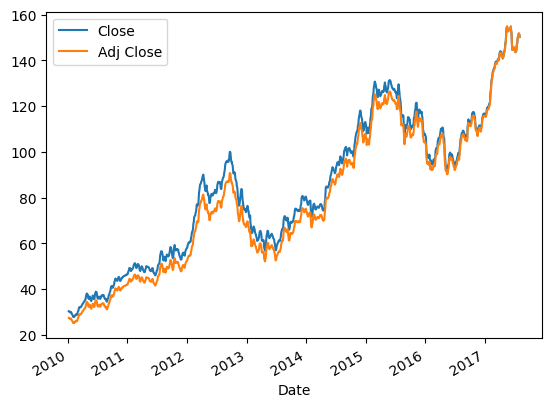

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

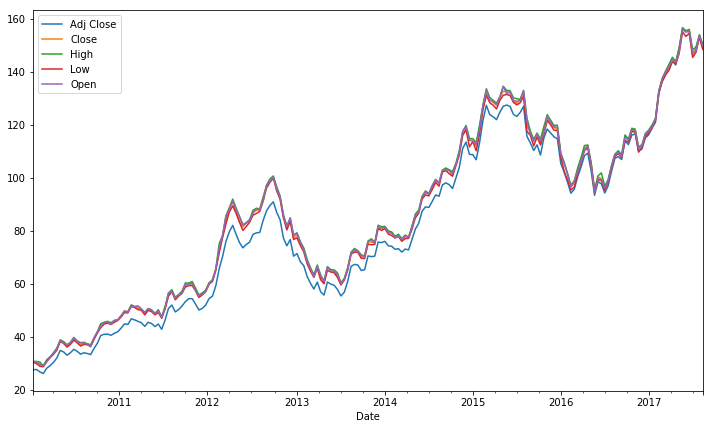

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

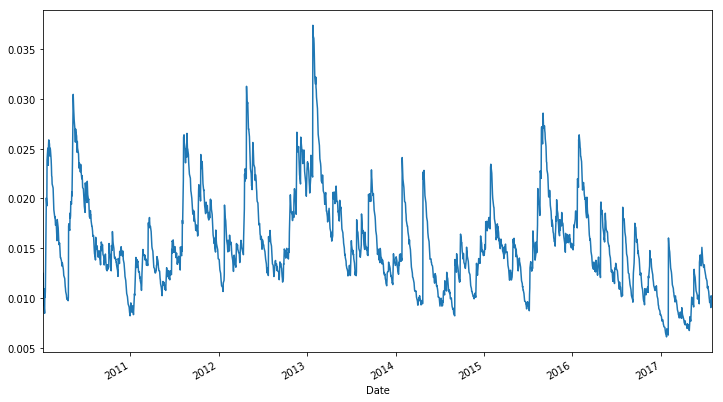

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

/content/demos/avocados.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  frame['Variety'].replace(


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

,0
Date,"datetime64[ns, UTC]"
Region,object
Variety,object
Organic,bool
Number of Stores,int64
Weighted Avg Price,float64
Low Price,float64
High Price,float64


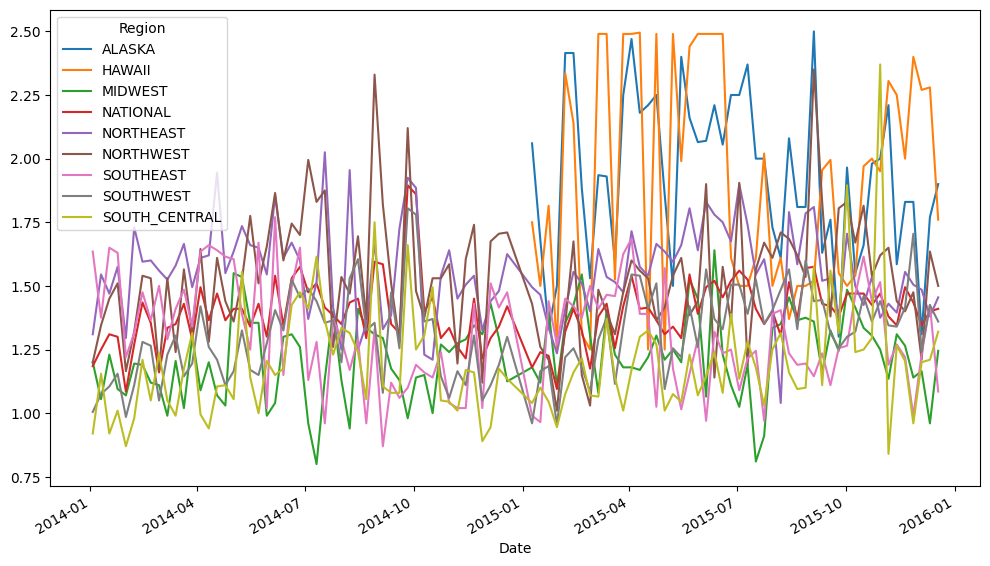

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

<ipython-input-151-9b1d8a2f0dc1>:17: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df


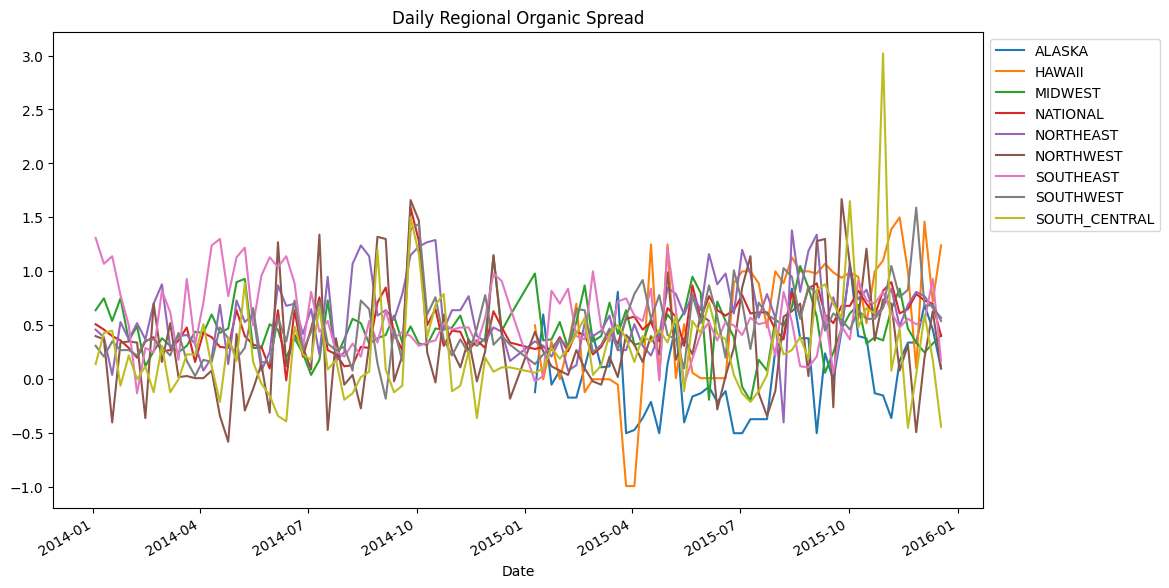

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

<ipython-input-151-9b1d8a2f0dc1>:17: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df


Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


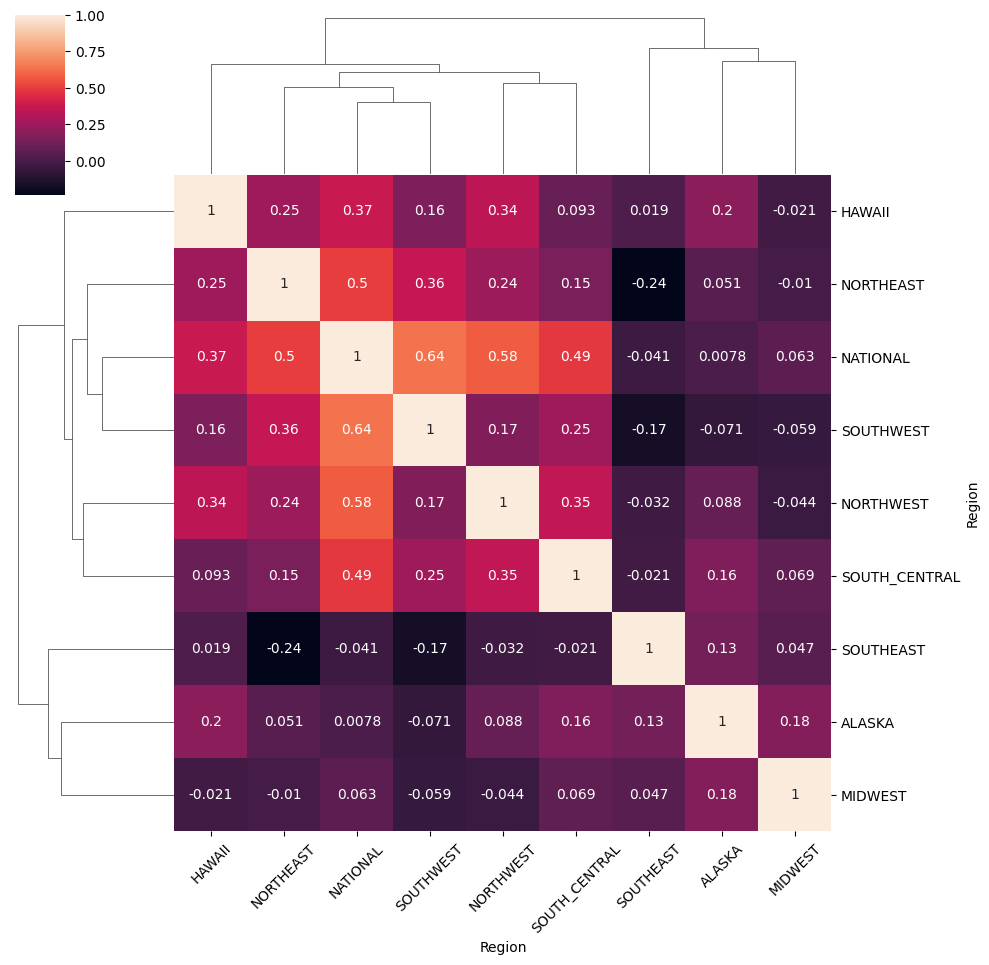

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

**My own example with COVID**

In [ ]:
from demos.myfile import read_covid_data
covid_data = read_covid_data('2020-03-05', '2020-04-01')
covid_data.head()

,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,...,pais_viajo_1_cod,pais_viajo_1_nom,recuperado,fecha_inicio_sintomas,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,per_etn_,fecha_muerte,nom_grupo_
0,2020-03-06,1,2020-03-02 00:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,...,380,ITALIA,Recuperado,2020-02-27 00:00:00,2020-03-06 00:00:00,2020-03-13 00:00:00,PCR,6,NaN,NaN
1,2020-03-09,2,2020-03-06 00:00:00,76,VALLE,76111,BUGA,34,1,M,...,724,ESPAÑA,Recuperado,2020-03-04 00:00:00,2020-03-09 00:00:00,2020-03-19 00:00:00,PCR,5,NaN,NaN
2,2020-03-09,3,2020-03-07 00:00:00,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,...,724,ESPAÑA,Recuperado,2020-02-29 00:00:00,2020-03-09 00:00:00,2020-03-15 00:00:00,PCR,6,NaN,NaN
3,2020-03-11,4,2020-03-09 00:00:00,5,ANTIOQUIA,5001,MEDELLIN,55,1,M,...,NaN,NaN,Recuperado,2020-03-06 00:00:00,2020-03-11 00:00:00,2020-03-26 00:00:00,PCR,6,NaN,NaN
4,2020-03-11,9,2020-03-08 00:00:00,11,BOGOTA,11001,BOGOTA,28,1,F,...,724,ESPAÑA,Recuperado,2020-03-07 00:00:00,2020-03-11 00:00:00,2020-03-23 00:00:00,PCR,6,NaN,NaN


In [ ]:
# Ejecuta la función y almacena el DataFrame en la variable 'covid'
covid = read_covid_data('2020-01-01', '2020-12-31', limit=1000)

# Verifica los tipos de datos del DataFrame
covid.dtypes

,0
fecha_reporte_web,datetime64[ns]
id_de_caso,object
fecha_de_notificaci_n,object
departamento,object
departamento_nom,object
ciudad_municipio,object
ciudad_municipio_nom,object
edad,int64
unidad_medida,object
sexo,object


<Axes: title={'center': 'Promedio de Casos de COVID-19 por Tipo de Contagio'}, xlabel='fecha_reporte_web'>

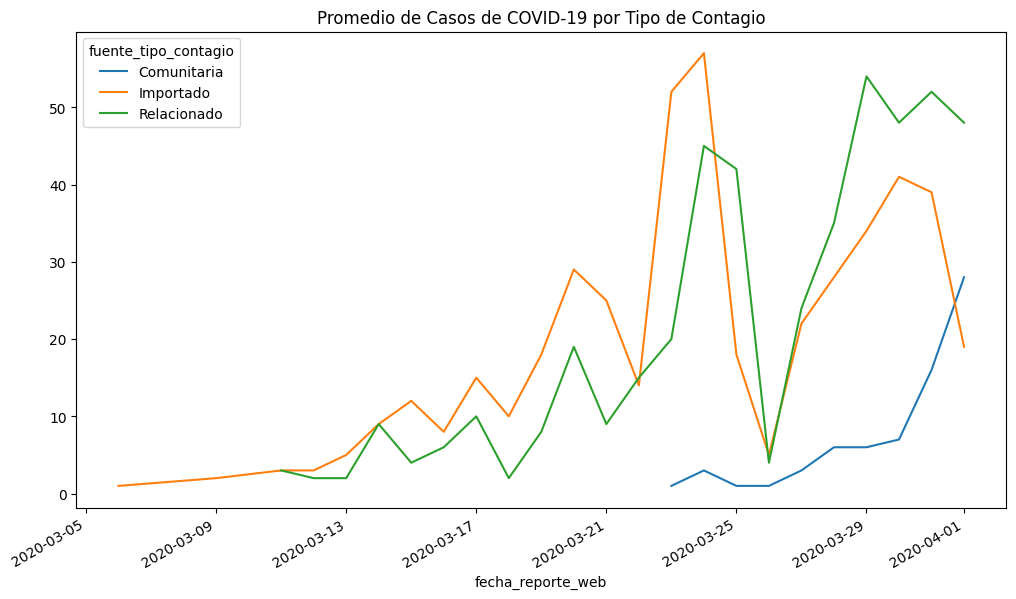

In [ ]:
# Agrupar los datos por fecha y tipo de contagio, contando los casos
covid_grouped = covid.groupby(['fecha_reporte_web', 'fuente_tipo_contagio'])['id_de_caso'].count()

# Usar unstack() para convertir la serie en un DataFrame
covid_grouped = covid_grouped.unstack().ffill()

# Plotea el promedio de casos por tipo de contagio
covid_grouped.plot(title='Promedio de Casos de COVID-19 por Tipo de Contagio')

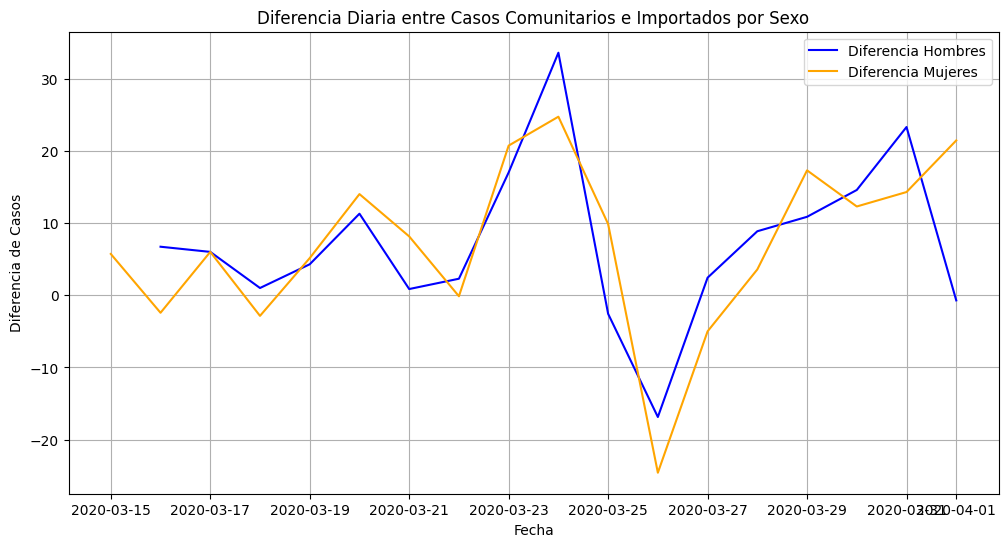

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def _contagion_spread(group):
    """Calcula la diferencia entre los casos de contagio de diferentes tipos."""
    if isinstance(group, pd.Series):
        return group['Comunitaria'] - group['Importado']

    c_contagion = group['Comunitaria'].squeeze()
    i_contagion = group['Importado'].squeeze()
    return c_contagion - i_contagion

def contagion_spread_by_gender(df):
    """Calcula la diferencia de casos comunitarios e importados entre hombres y mujeres."""
    # Agrupa los casos por fecha y sexo
    grouped = df.groupby(['fecha_reporte_web', 'sexo'])['id_de_caso'].count().unstack().ffill()

    # Crear un DataFrame para almacenar las diferencias
    contagion_data = pd.DataFrame(index=grouped.index)

    # Asegúrate de que existan las columnas 'M' y 'F' para hombres y mujeres
    if 'M' in grouped.columns and 'F' in grouped.columns:
        # Calcula la diferencia para hombres y mujeres
        contagion_data['Hombres'] = grouped['M'] - grouped['M'].rolling(window=7).mean()  # Ajuste según sea necesario
        contagion_data['Mujeres'] = grouped['F'] - grouped['F'].rolling(window=7).mean()  # Ajuste según sea necesario

    return contagion_data

# Cálculo de diferencias
contagion_data = contagion_spread_by_gender(covid)

# Ploteo de resultados
plt.figure(figsize=(12, 6))

# Ploteo de la diferencia entre casos comunitarios e importados en hombres y mujeres
plt.plot(contagion_data.index, contagion_data['Hombres'], label='Diferencia Hombres', color='blue')
plt.plot(contagion_data.index, contagion_data['Mujeres'], label='Diferencia Mujeres', color='orange')

plt.title('Diferencia Diaria entre Casos Comunitarios e Importados por Sexo')
plt.xlabel('Fecha')
plt.ylabel('Diferencia de Casos')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por fecha, tipo de contagio y sexo
covid_grouped = covid.groupby(['fecha_reporte_web', 'fuente_tipo_contagio', 'sexo'])['id_de_caso'].count().unstack(['fuente_tipo_contagio', 'sexo']).ffill()

# Calcular la correlación entre los casos comunitarios e importados en hombres y mujeres
spread_correlation = covid_grouped.corr()

# Mostrar la correlación
spread_correlation

fuente_tipo_contagio      Importado           Relacionado            \
sexo                              F         M           F         M   
fuente_tipo_contagio sexo                                             
Importado            F     1.000000  0.839461    0.516473  0.676586   
                     M     0.839461  1.000000    0.479705  0.685746   
Relacionado          F     0.516473  0.479705    1.000000  0.821777   
                     M     0.676586  0.685746    0.821777  1.000000   
Comunitaria          M     0.024784 -0.032698    0.613973  0.606815   
                     F    -0.055314 -0.184455    0.411005  0.235780   

fuente_tipo_contagio      Comunitaria            
sexo                                M         F  
fuente_tipo_contagio sexo                        
Importado            F       0.024784 -0.055314  
                     M      -0.032698 -0.184455  
Relacionado          F       0.613973  0.411005  
                     M       0.606815  0.235780  
Comunitaria          M       1.000000  0.830021  
                     F       0.830021  1.000000

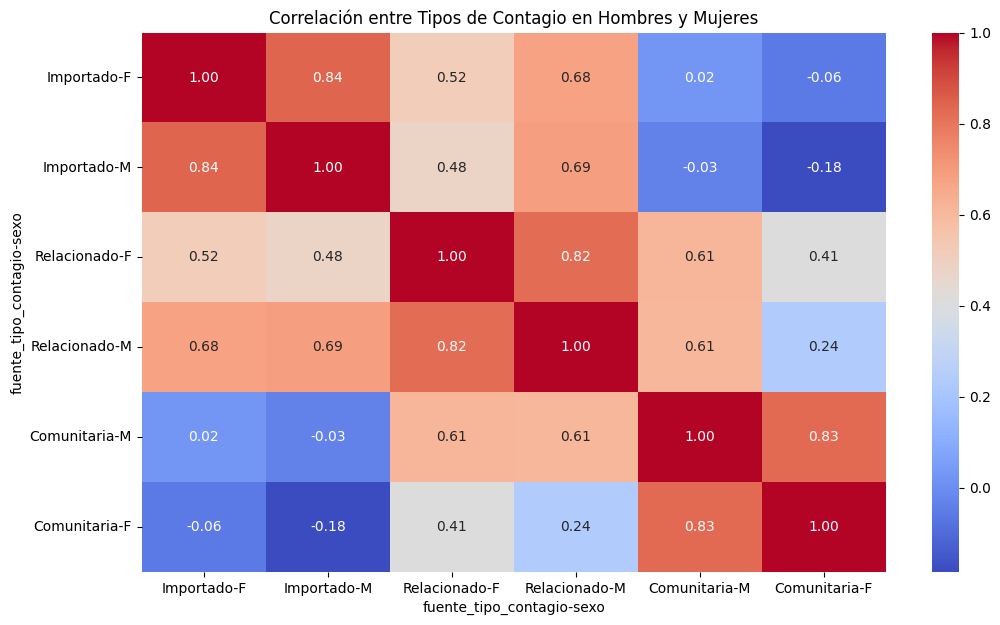

In [ ]:
# Visualización de la matriz de correlación
import seaborn as sns
sns.heatmap(spread_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre Tipos de Contagio en Hombres y Mujeres")
plt.show()

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!